In [1]:
from dataset import IAM, Encoder
from dataloader import CTCDataLoader
from model import CRNNModel
from deslant import deslant

from torch.utils.data import DataLoader
import albumentations as A
from sklearn import preprocessing
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import Compose, ToTensor, Resize
import cv2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
dataset = IAM('/mnt/d/Machine-Learning/Datasets/iamdataset/uncompressed', csv_file_path='iam_df.csv')

In [3]:
print("Size of Dataset:", len(dataset))
print("Character set:", dataset.charset)
print("Vocab size:", len(dataset.charset))
dataset.data.head(10)

Size of Dataset: 13353
Character set:  !"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
Vocab size: 79


,Image,Segmentation,Transcription,Threshold
0,a01-000u-00.png,ok,A MOVE to stop Mr. Gaitskell from,154
1,a01-000u-01.png,ok,nominating any more Labour life Peers,156
2,a01-000u-02.png,ok,is to be made at a meeting of Labour,157
3,a01-000u-03.png,err,M Ps tomorrow. Mr. Michael Foot has,156
4,a01-000u-04.png,ok,put down a resolution on the subject,157
5,a01-000u-05.png,err,and he is to be backed by Mr. Will,156
6,a01-000u-06.png,ok,"Griffiths, M P for Manchester Exchange.",159
7,a01-000x-00.png,ok,A MOVE to stop Mr. Gaitskell from nominating,182
8,a01-000x-01.png,ok,any more Labour life Peers is to be made at a,181
9,a01-000x-02.png,ok,meeting of Labour 0M Ps tomorrow. Mr. Michael,181


In [4]:
encoder = Encoder()
data_loader = CTCDataLoader(dataset, encoder)
train_loader, val_loader, test_loader = data_loader(split=(0.6, 0.2, 0.2), batch_size=(32, 16, 16))

0.06110668182373047
0.032740592956542970.036655426025390625

0.04751229286193848
0.05836176872253418
0.03618621826171875
0.04009056091308594
0.0390625
0.034423112869262695
0.030948162078857422
0.0381169319152832
0.04680299758911133
0.038828134536743164
0.02753305435180664
0.03997659683227539
0.03511643409729004
0.03394818305969238
0.03561878204345703
0.03281688690185547
0.029996156692504883
0.028287887573242188
0.03472590446472168
0.0360102653503418
0.03091287612915039
0.035575151443481445
0.03882622718811035
0.0403897762298584
0.037815093994140625
0.03165316581726074
0.032331228256225586
0.034210205078125
0.0359494686126709
0.038260698318481445
0.04001784324645996
0.038318634033203125
0.037299394607543945
0.041930437088012695
0.04089832305908203
0.03440237045288086
0.03598785400390625
0.04249238967895508
0.03708934783935547
0.031548261642456055
0.03574323654174805
0.035124778747558594
0.03046727180480957
0.03011035919189453
0.028622150421142578
0.03114485740661621
0.02931070327758789


TypeError: Invalid shape (1024,) for image data

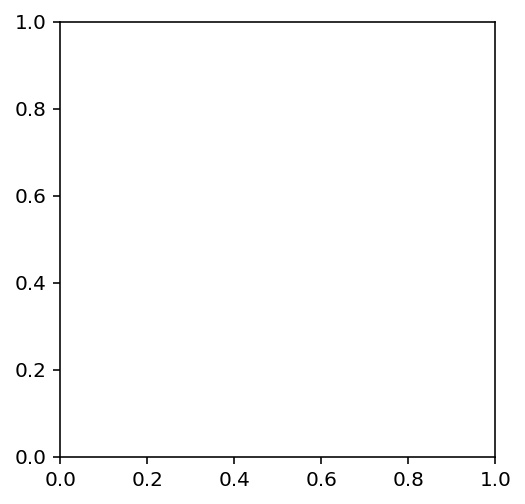

In [5]:
moe, _ = dataset[0]
for i in train_loader:
    img, target, target_len, _ = i
    img = img[0][0]
    plt.imshow(img, cmap='gray')
    break

Calculate Loss: <br>
    1. Permute the tensor to bring the time_steps at first axis, i.e, from batch_size X time_steps X features to time_steps X batch X features <br>
        1.i.`out = out.permute(1, 0, 2)`<br>
    2. Perform log_softmax on feature axis on of the output tensor (ex: -1)<br>
        2.i. `out = F.log_softmax(out, dim=2) `<br>
    3. Specify length of inputs<br>
        3.i. `input_lengths = torch.full(size=(out.shape[1]), fill_value=out.shape[0], dtype=torch.int32)`<br>
    4. Specify the length of outputs (target) <br>
    5. Calculate loss
        5.i. `loss = nn.CTCLoss(blank=0, out, input_lengths, target_lengts)`


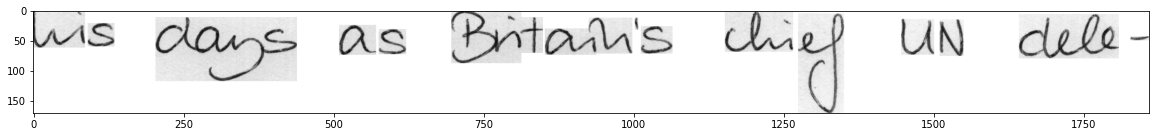

In [88]:
path = 'images/a02-012/a02-012-04.png'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(20, 10))
plt.imshow(img, cmap='gray')

array([ 67,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223,
       224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236,
       237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 24

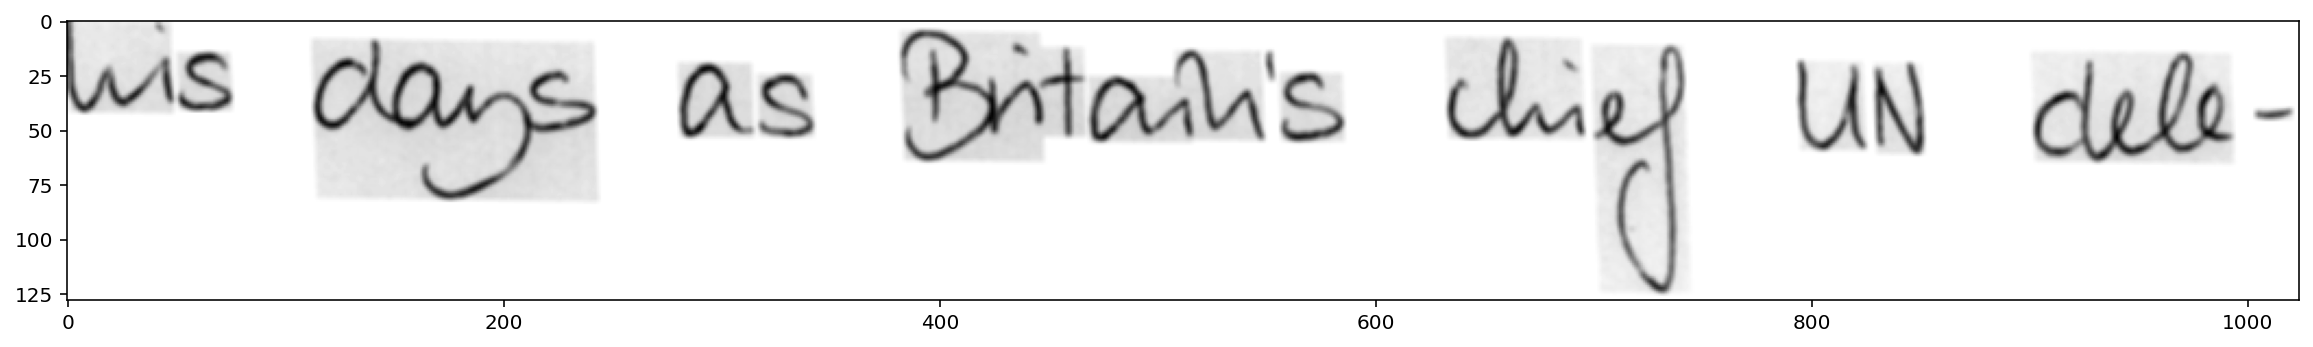

In [292]:

# Binarize the image
_,binary_image = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Affine Transform
affine_transform = A.augmentations.geometric.transforms.Affine(fit_output=True, shear=(-5, 5), rotate=None, cval=255, p=1.0)
# affine_image = affine_transform(image=binary_image)['image']

albu = A.Compose([
    A.augmentations.geometric.transforms.Affine(fit_output=True, shear=(-5, 5), cval=255, p=1.0),
    A.augmentations.geometric.Resize(height=128, width=1024, always_apply=True),
    A.augmentations.transforms.Blur(blur_limit=(3, 4), p=0.4),
])
albumented_image = albu(image=img)['image']

# f, axes = plt.subplots(4, 1, figsize=(20, 10))

# # we use `axes.ravel()` to turn these into a list
# axes = axes.ravel()

# for ax in axes:
#     ax.axis('off') # switch off the axis (lose the x and y axis tick marks on the edges)

# axes[0].imshow(affine_image1)

# axes[1].imshow(affine_image2)

# axes[2].imshow(affine_image3)

# axes[3].imshow(affine_image4)


# Resize
# resized_image = cv2.resize(np.array(affine_image, dtype=np.float32), (1024, 128), interpolation=cv2.INTER_AREA)

plt.figure(figsize=(20, 10))
plt.imshow(albumented_image, cmap='gray')
np.unique(albumented_image)


(128, 1024)

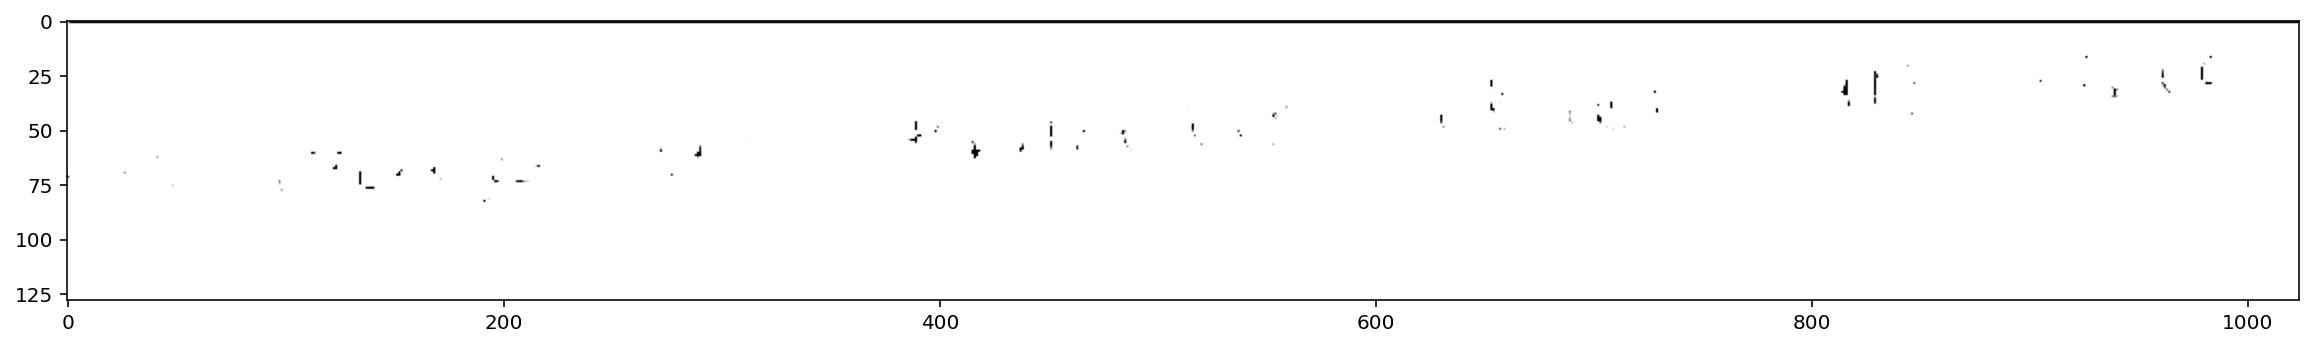

In [262]:
# Piecewise Affine Transform
elastic_transform = A.augmentations.geometric.transforms.PiecewiseAffine(always_apply=True, nb_rows=2, nb_cols=2)
elastic_image = elastic_transform(image=resized_image)['image']

plt.figure(figsize=(20, 10))
plt.imshow(elastic_image, cmap='gray')
elastic_image.shape

In [6]:
image = deslant(img, bg_color=255).img
# # Binarize
# image = (image > int(self.data.at[index, 'Threshold'])) * 1

# Otsu's thresholding
_,image = cv2.threshold(image,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Resize
image = cv2.resize(np.array(image, dtype=np.float32), (1024, 128),
                    interpolation=cv2.INTER_AREA)
# Rotate
image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

transforms = Compose([
    ToTensor(),
])
image = transforms(image)
image = torch.unsqueeze(image, dim=0)


NameError: name 'img' is not defined

In [5]:

model = CRNNModel(vocab_size=79, time_steps=100)
device = 'cpu'
checkpoint = torch.load(
    'checkpoints/training_state.pth', map_location=device)
model.load_state_dict(checkpoint['model_state'])
model.eval()
pred = model(transformed_image)
plt.figure(figsize=(20, 10))
plt.imshow(img, cmap='gray')
print(encoder.best_path_decode(pred, True))

NameError: name 'transformed_image' is not defined

In [37]:
dataset.data.head()

,Image,Segmentation,Transcription,Threshold
0,a01-000u-00.png,ok,A MOVE to stop Mr. Gaitskell from,154
1,a01-000u-01.png,ok,nominating any more Labour life Peers,156
2,a01-000u-02.png,ok,is to be made at a meeting of Labour,157
3,a01-000u-03.png,err,M Ps tomorrow. Mr. Michael Foot has,156
4,a01-000u-04.png,ok,put down a resolution on the subject,157


'\\'

In [4]:
lstm = torch.nn.LSTM(input_size=1024, hidden_size=512, num_layers=2, 
                            bidirectional=True, batch_first=True)
linear1 = torch.nn.Linear(1024, 256)
linear2 = torch.nn.Linear(256, 80)

out, _ = lstm(torch.rand(4, 32, 1024))
out = linear1(out)
out = linear2(out)
out.shape

torch.Size([4, 32, 80])